In [1]:
from QASMBench.interface.qiskit import QASMBenchmark
path = 'QASMBench'

category = 'medium'
# select only the circuits with the number of qubits in the list
num_qubits_list = list(range(3, 50))

# whether to remove the final measurement in the circuit
remove_final_measurements = True

# whether use qiskit.transpile() to transpile the circuits (note: must provide qiskit backend)
do_transpile = False

# arguments for qiskit.transpile(). backend should be provide at least
transpile_args = {}

bm = QASMBenchmark(path, category, num_qubits_list=num_qubits_list, remove_final_measurements=remove_final_measurements, do_transpile=do_transpile, **transpile_args)

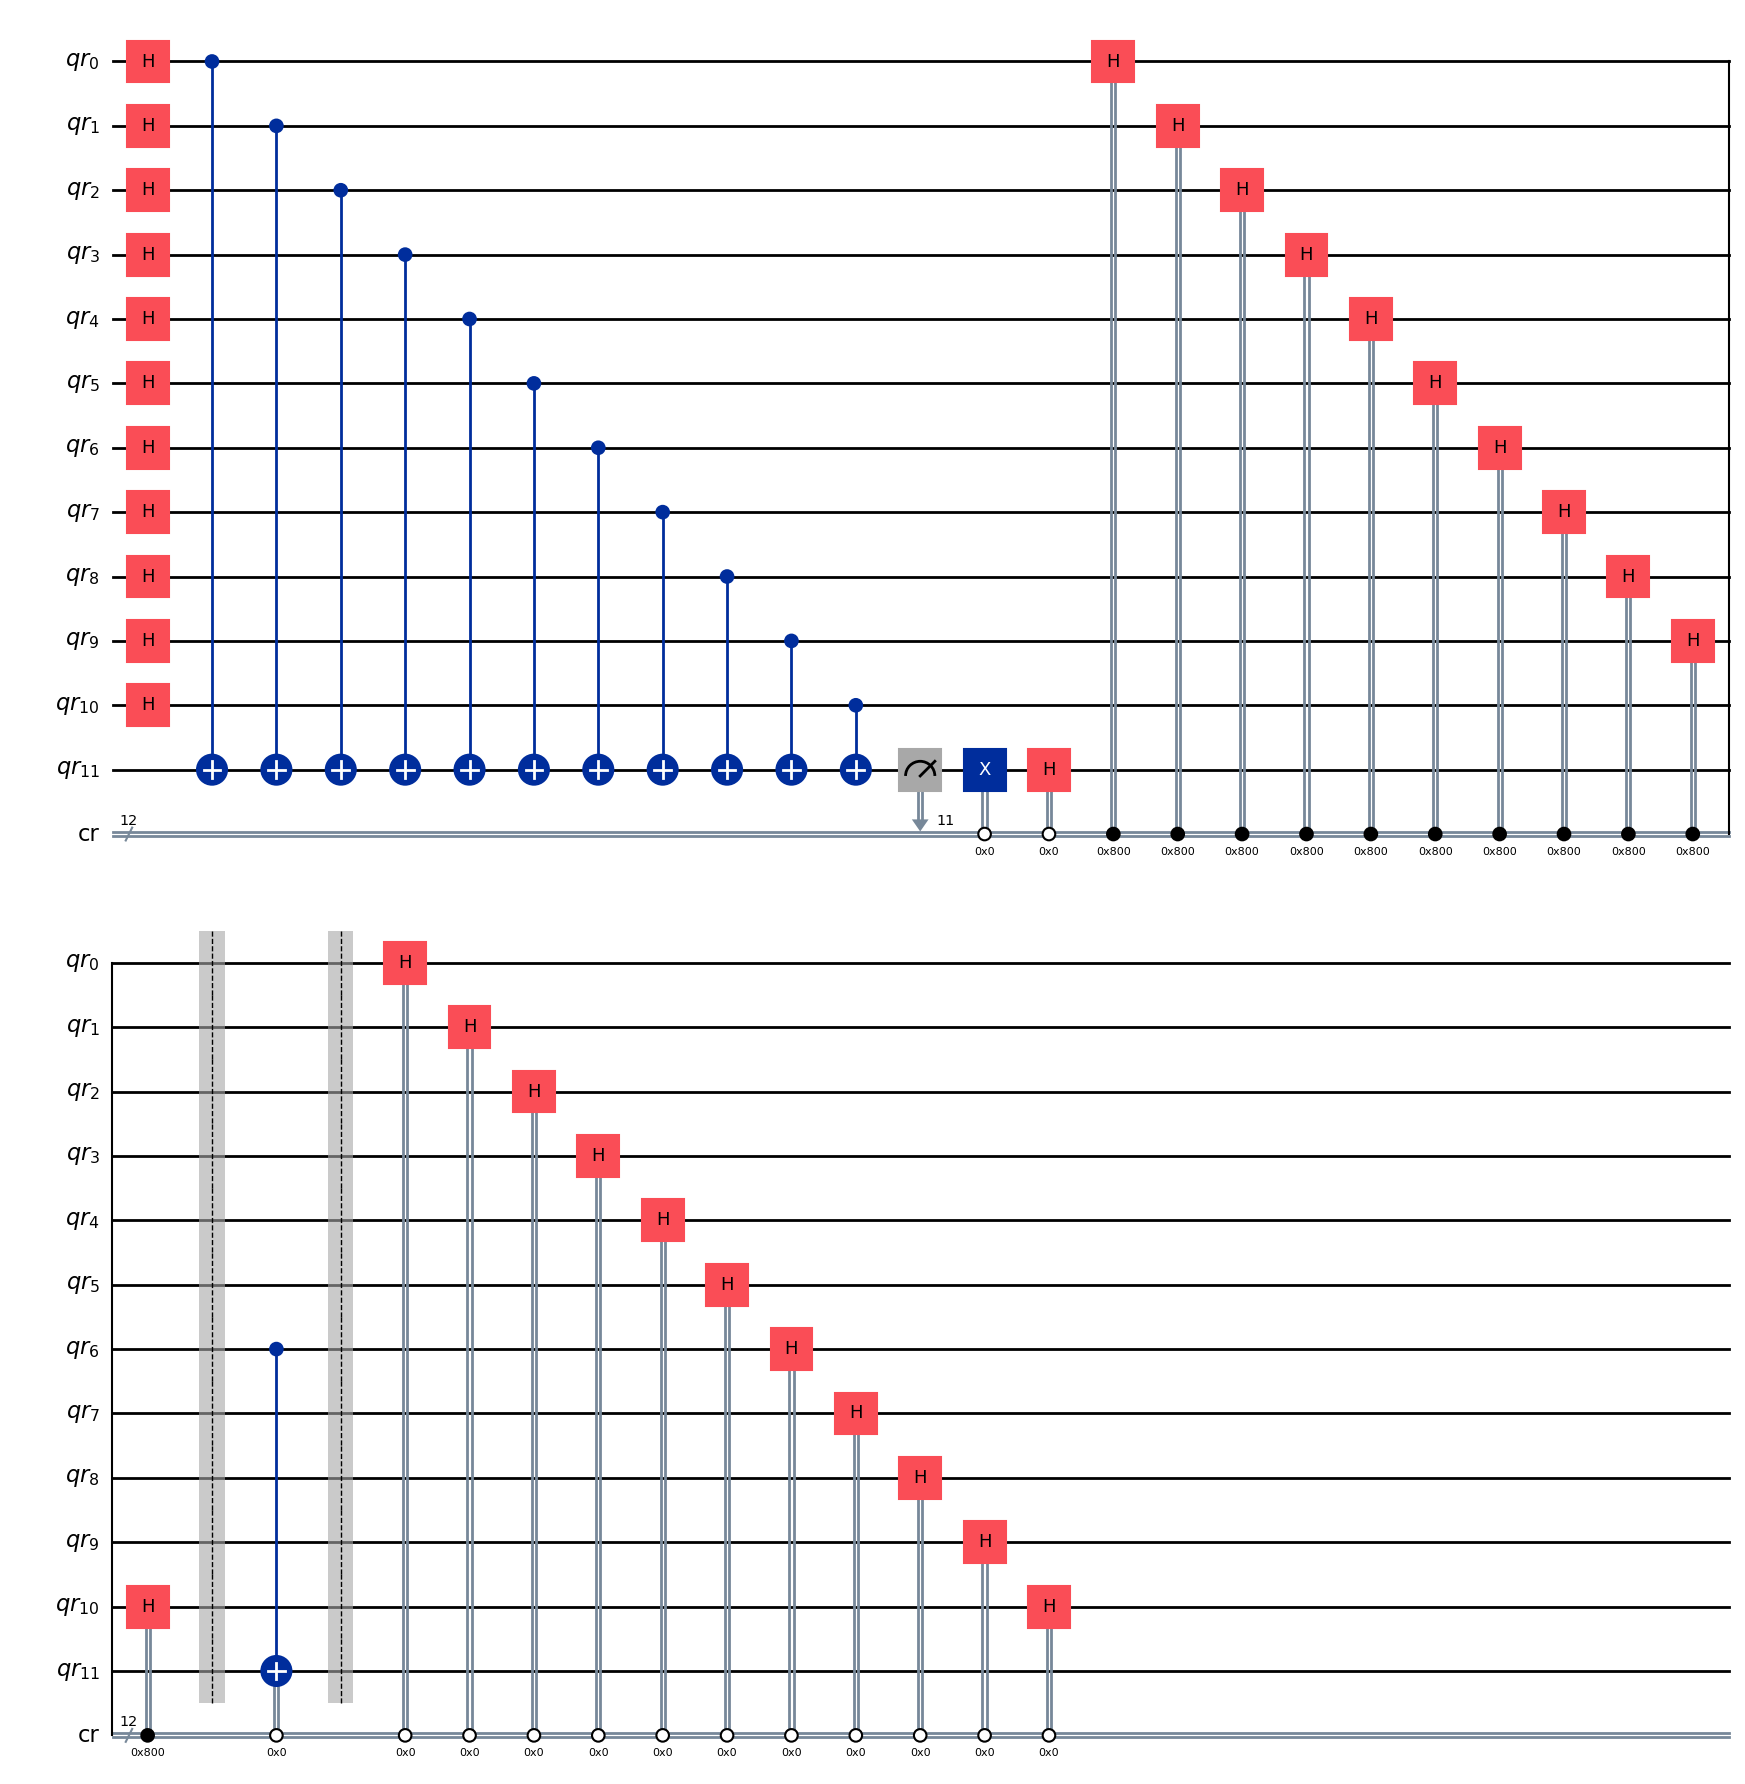

In [2]:
circuit = bm.get('cc_n12')
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# qreg = QuantumRegister(2, 'q')
# creg = ClassicalRegister(2, 'c')
# circuit = QuantumCircuit(qreg, creg)

# circuit.cx(qreg[0], qreg[1])

# circuit.measure(qreg[0], creg[0])
# circuit.x(qreg[1]).c_if(creg, 0)

# print(circuit.data)

circuit.draw(output='mpl')

DAGOpNode info:
3103460126720
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460126864
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460592640
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460590768
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460600272
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460605744
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460602432
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460600992
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460593648
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460595088
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460601568
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103460604160
Num CLbits 0
gate name: cx
cargs: []
Condition: None
DAGOpNode info:

<Axes: >

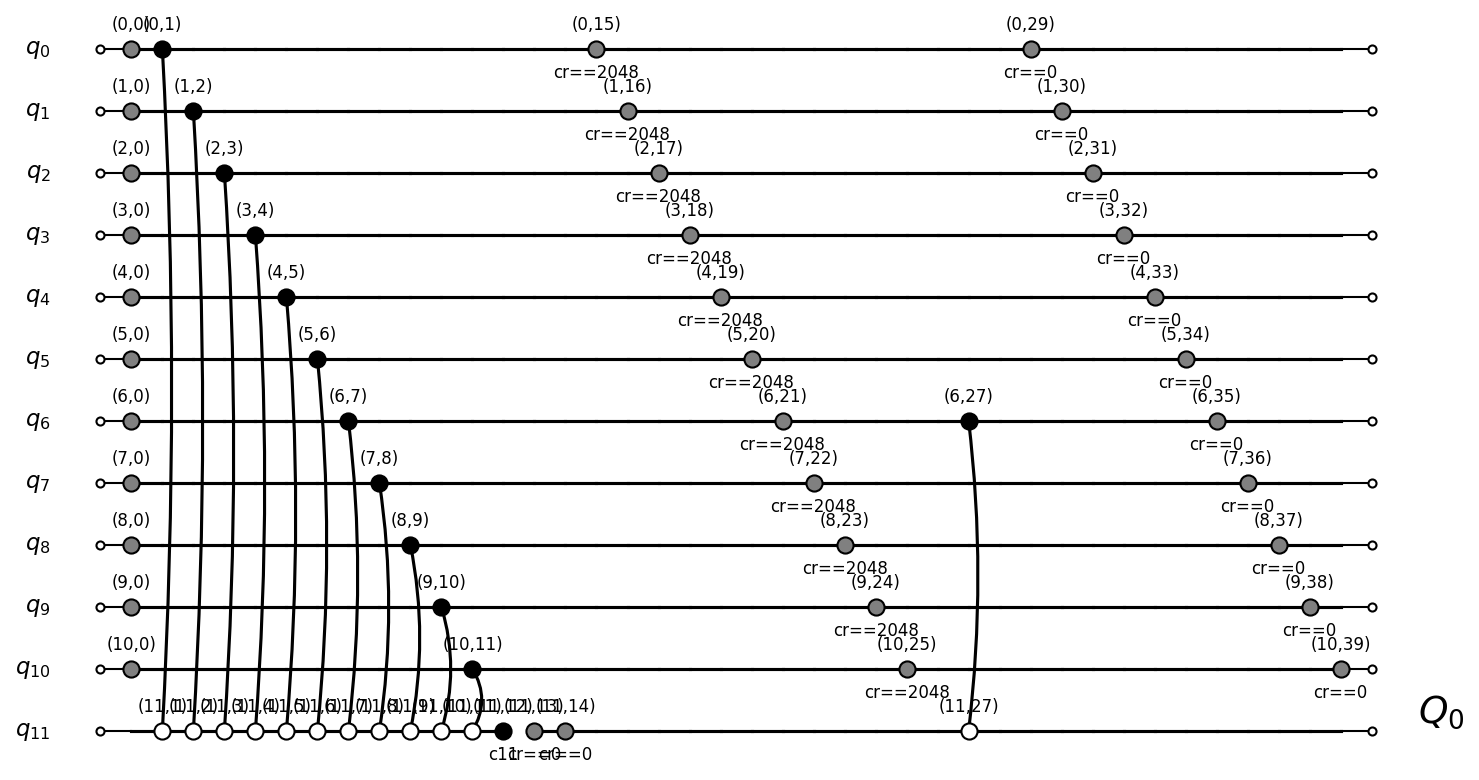

In [3]:
from disqco.graphs.QC_hypergraph import QuantumCircuitHyperGraph
%load_ext jupyter_tikz

hypergraph = QuantumCircuitHyperGraph(circuit)

print(circuit.depth())
print(hypergraph.depth)

for i, layer in hypergraph.layers.items():
    print(layer)

hypergraph.draw(output='mpl')

DAGOpNode info:
3103460598256
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471611760
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471601968
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471612912
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471603264
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471609600
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471604560
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471615216
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471609168
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471607152
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471614928
Num CLbits 0
gate name: h
cargs: []
Condition: None
DAGOpNode info:
3103471609888
Num CLbits 0
gate name: cx
cargs: []
Condition: None
DAGOpNode info:

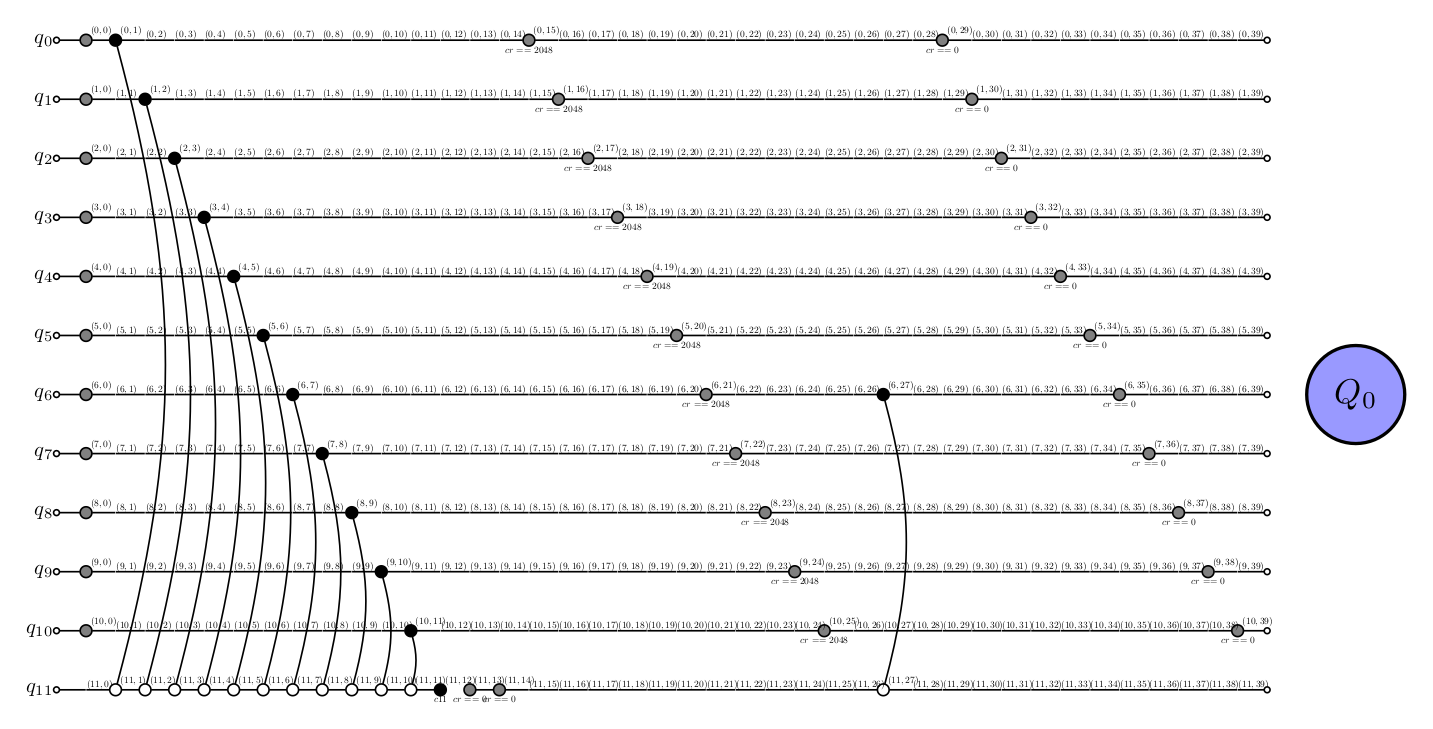

In [4]:
# Rebuild hypergraph to reflect updated layer extraction and labels
from importlib import reload
from disqco.utils import qiskit_to_op_list as q2l
reload(q2l)
from disqco.graphs import QC_hypergraph as qch
reload(qch)

hypergraph = qch.QuantumCircuitHyperGraph(circuit)
hypergraph.draw(output='tikz')